In [31]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

# Data Preprocessing

## 1. Standardize numerical features (Z-standardization)


In [2]:
train = pd.read_pickle("data/train.pkl")

In [3]:
train["tenure"]

0       33
1       49
2       56
3       66
4        1
        ..
5629    31
5630    60
5631    18
5632     1
5633    63
Name: tenure, Length: 5634, dtype: int64

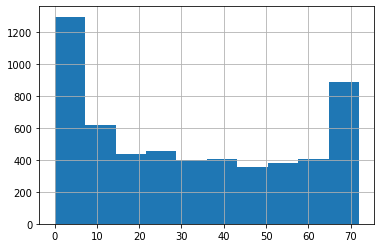

In [4]:
train["tenure"].hist();

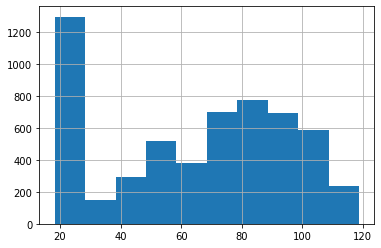

In [5]:
train["MonthlyCharges"].hist()

In [6]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

In [8]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_fitted = std.fit(train[num_cols])

In [9]:
scaled = pd.DataFrame(scaled_fitted.transform(train[num_cols]), columns=num_cols)

In [10]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,0.029040,0.532130,0.175307
1,0.680546,1.122466,1.164956
2,0.965580,1.355274,1.566211
3,1.372771,-1.484988,-0.439662
4,-1.273973,-0.666833,-0.982447
...,...,...,...
5629,-0.052399,-1.470022,-0.732208
5630,1.128456,1.024354,1.573990
5631,-0.581747,1.220578,-0.206710
5632,-1.273973,0.887995,-0.961725


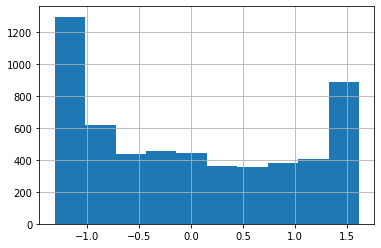

In [11]:
scaled["tenure"].hist()

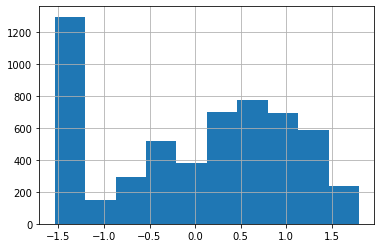

In [12]:
scaled["MonthlyCharges"].hist()

In [13]:
train[num_cols] = scaled

In [14]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9369-XFEHK,Female,1,Yes,No,0.029040,Yes,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Bank transfer (automatic),0.532130,0.175307,Yes
1,3545-CNWRG,Female,0,Yes,Yes,0.680546,Yes,1,Fiber optic,0,...,0,0,1,1,Month-to-month,Yes,Electronic check,1.122466,1.164956,No
2,0899-WZRSD,Male,0,No,No,0.965580,Yes,1,Fiber optic,1,...,0,1,1,1,Month-to-month,Yes,Mailed check,1.355274,1.566211,No
3,1764-VUUMT,Male,0,No,Yes,1.372771,Yes,0,No,0,...,0,0,0,0,Two year,No,Credit card (automatic),-1.484988,-0.439662,No
4,2903-YYTBW,Male,0,Yes,Yes,-1.273973,Yes,0,DSL,0,...,0,0,0,0,Month-to-month,No,Electronic check,-0.666833,-0.982447,No


# 2. Handle categorical columns

In [17]:
train.nunique()

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1495
TotalCharges        5282
Churn                  2
dtype: int64

In [18]:
cat_cols = ["InternetService", "Contract", "PaymentMethod"]

In [20]:
train["InternetService"].head()

0    Fiber optic
1    Fiber optic
2    Fiber optic
3             No
4            DSL
Name: InternetService, dtype: object

In [28]:
train = pd.get_dummies(data=train,
                       columns=cat_cols,
                       drop_first=True)

# 3. Convert bools to int

In [29]:
train.nunique()

customerID                               5634
gender                                      2
SeniorCitizen                               2
Partner                                     2
Dependents                                  2
tenure                                     73
PhoneService                                2
MultipleLines                               2
OnlineSecurity                              2
OnlineBackup                                2
DeviceProtection                            2
TechSupport                                 2
StreamingTV                                 2
StreamingMovies                             2
PaperlessBilling                            2
MonthlyCharges                           1495
TotalCharges                             5282
Churn                                       2
InternetService_Fiber optic                 2
InternetService_No                          2
Contract_One year                           2
Contract_Two year                 

In [32]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9369-XFEHK,Female,1,Yes,No,0.029040,Yes,1,0,1,0,0,0,0,Yes,0.532130,0.175307,Yes,1,0,0,0,0,0,0
1,3545-CNWRG,Female,0,Yes,Yes,0.680546,Yes,1,0,1,0,0,1,1,Yes,1.122466,1.164956,No,1,0,0,0,0,1,0
2,0899-WZRSD,Male,0,No,No,0.965580,Yes,1,1,0,0,1,1,1,Yes,1.355274,1.566211,No,1,0,0,0,0,0,1
3,1764-VUUMT,Male,0,No,Yes,1.372771,Yes,0,0,0,0,0,0,0,No,-1.484988,-0.439662,No,0,1,0,1,1,0,0
4,2903-YYTBW,Male,0,Yes,Yes,-1.273973,Yes,0,0,0,0,0,0,0,No,-0.666833,-0.982447,No,0,0,0,0,0,1,0


In [33]:
# first, handle the Yes/No columns
to_bool = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

In [42]:
train[to_bool] = np.where(train[to_bool] == "Yes", 1, 0)

In [43]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9369-XFEHK,Female,1,1,0,0.029040,1,1,0,1,0,0,0,0,1,0.532130,0.175307,1,1,0,0,0,0,0,0
1,3545-CNWRG,Female,0,1,1,0.680546,1,1,0,1,0,0,1,1,1,1.122466,1.164956,0,1,0,0,0,0,1,0
2,0899-WZRSD,Male,0,0,0,0.965580,1,1,1,0,0,1,1,1,1,1.355274,1.566211,0,1,0,0,0,0,0,1
3,1764-VUUMT,Male,0,0,1,1.372771,1,0,0,0,0,0,0,0,0,-1.484988,-0.439662,0,0,1,0,1,1,0,0
4,2903-YYTBW,Male,0,1,1,-1.273973,1,0,0,0,0,0,0,0,0,-0.666833,-0.982447,0,0,0,0,0,0,1,0


In [47]:
train = pd.get_dummies(train,
                       columns=["gender"],
                       drop_first=True)

# 4. Create a preprocessing function for the test set

In [48]:
def preprocess(df, trained_standardization_factors):
    df_copy = df.copy().reset_index(drop=True)
    
    # standardize numerical columns
    num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    df_copy[num_cols] = pd.DataFrame(trained_standardization_factors.transform(df_copy[num_cols]), columns=num_cols)
    
    # create dummies from categorical columns
    cat_cols = ["InternetService", "Contract", "PaymentMethod"]
    df_copy = pd.get_dummies(data=df_copy,
                             columns=cat_cols,
                             drop_first=True)
    
    # convert bools to int
    to_bool = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
    df_copy[to_bool] = np.where(df_copy[to_bool] == "Yes", 1, 0)
    df_copy = pd.get_dummies(df_copy,
                             columns=["gender"],
                             drop_first=True)
    
    return df_copy

In [49]:
train_1 = pd.read_pickle("data/train.pkl")

In [54]:
preprocess(train_1, scaled_fitted)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,9369-XFEHK,1,1,0,0.029040,1,1,0,1,0,0,0,0,1,0.532130,0.175307,1,1,0,0,0,0,0,0,0
1,3545-CNWRG,0,1,1,0.680546,1,1,0,1,0,0,1,1,1,1.122466,1.164956,0,1,0,0,0,0,1,0,0
2,0899-WZRSD,0,0,0,0.965580,1,1,1,0,0,1,1,1,1,1.355274,1.566211,0,1,0,0,0,0,0,1,1
3,1764-VUUMT,0,0,1,1.372771,1,0,0,0,0,0,0,0,0,-1.484988,-0.439662,0,0,1,0,1,1,0,0,1
4,2903-YYTBW,0,1,1,-1.273973,1,0,0,0,0,0,0,0,0,-0.666833,-0.982447,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6265-FRMTQ,0,0,0,-0.052399,1,0,0,0,0,0,0,0,0,-1.470022,-0.732208,0,0,1,0,1,0,0,0,1
5630,4742-DRORA,0,1,1,1.128456,1,1,1,0,1,0,1,0,1,1.024354,1.573990,0,1,0,1,0,0,0,0,1
5631,6693-FRIRW,0,0,0,-0.581747,1,0,0,1,1,0,1,1,0,1.220578,-0.206710,0,1,0,0,0,1,0,0,1
5632,3988-RQIXO,1,0,0,-1.273973,1,0,0,0,0,0,1,1,1,0.887995,-0.961725,1,1,0,0,0,0,1,0,0


In [55]:
test = pd.read_pickle("data/test.pkl")

In [58]:
preprocess(test, scaled_fitted)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,8707-RMEZH,1,1,0,1.494928,1,0,1,1,0,0,0,1,0,0.754961,1.681944,0,1,0,1,0,1,0,0,0
1,1216-BGTSP,0,0,0,0.517669,1,1,1,0,1,1,1,1,1,1.458375,1.198422,0,1,0,0,0,1,0,0,1
2,5118-MUEYH,0,1,0,0.639827,1,1,0,1,0,1,1,1,1,1.346960,1.251102,0,1,0,0,0,1,0,0,0
3,4821-SJHJV,0,1,1,-0.011679,1,1,1,0,0,0,1,0,0,0.831455,0.284036,0,1,0,0,0,0,1,0,0
4,8245-UMPYT,1,0,0,-0.663186,1,1,0,0,0,0,1,1,1,1.057612,-0.301323,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0468-YRPXN,0,0,0,-0.133837,1,0,0,0,1,1,1,1,1,1.137432,0.242060,0,1,0,0,0,1,0,0,1
1405,6522-YRBXD,1,1,0,0.110478,1,1,1,1,0,0,0,1,1,0.996084,0.489528,0,1,0,0,0,0,1,0,1
1406,9172-ANCRX,0,0,0,-0.907500,1,1,1,0,0,0,1,1,1,1.134106,-0.570798,1,1,0,0,0,0,1,0,0
1407,7560-QRBXH,0,0,1,0.639827,1,0,0,0,0,0,0,0,0,-1.484988,-0.586999,0,0,1,1,0,0,0,1,0
